**Task 3:**

**IMAGE CAPTIONING**

Combine computer vision and natural language processing to build an image captioning Al. Use pre-trained image recognition models like VGG or ResNet to extract features from images, and then use a recurrent neural network (RNN) or transformer-based model to generate captions for those images

In [1]:
import numpy as np
import cv2
img=cv2.imread("/content/DOG.jpg")

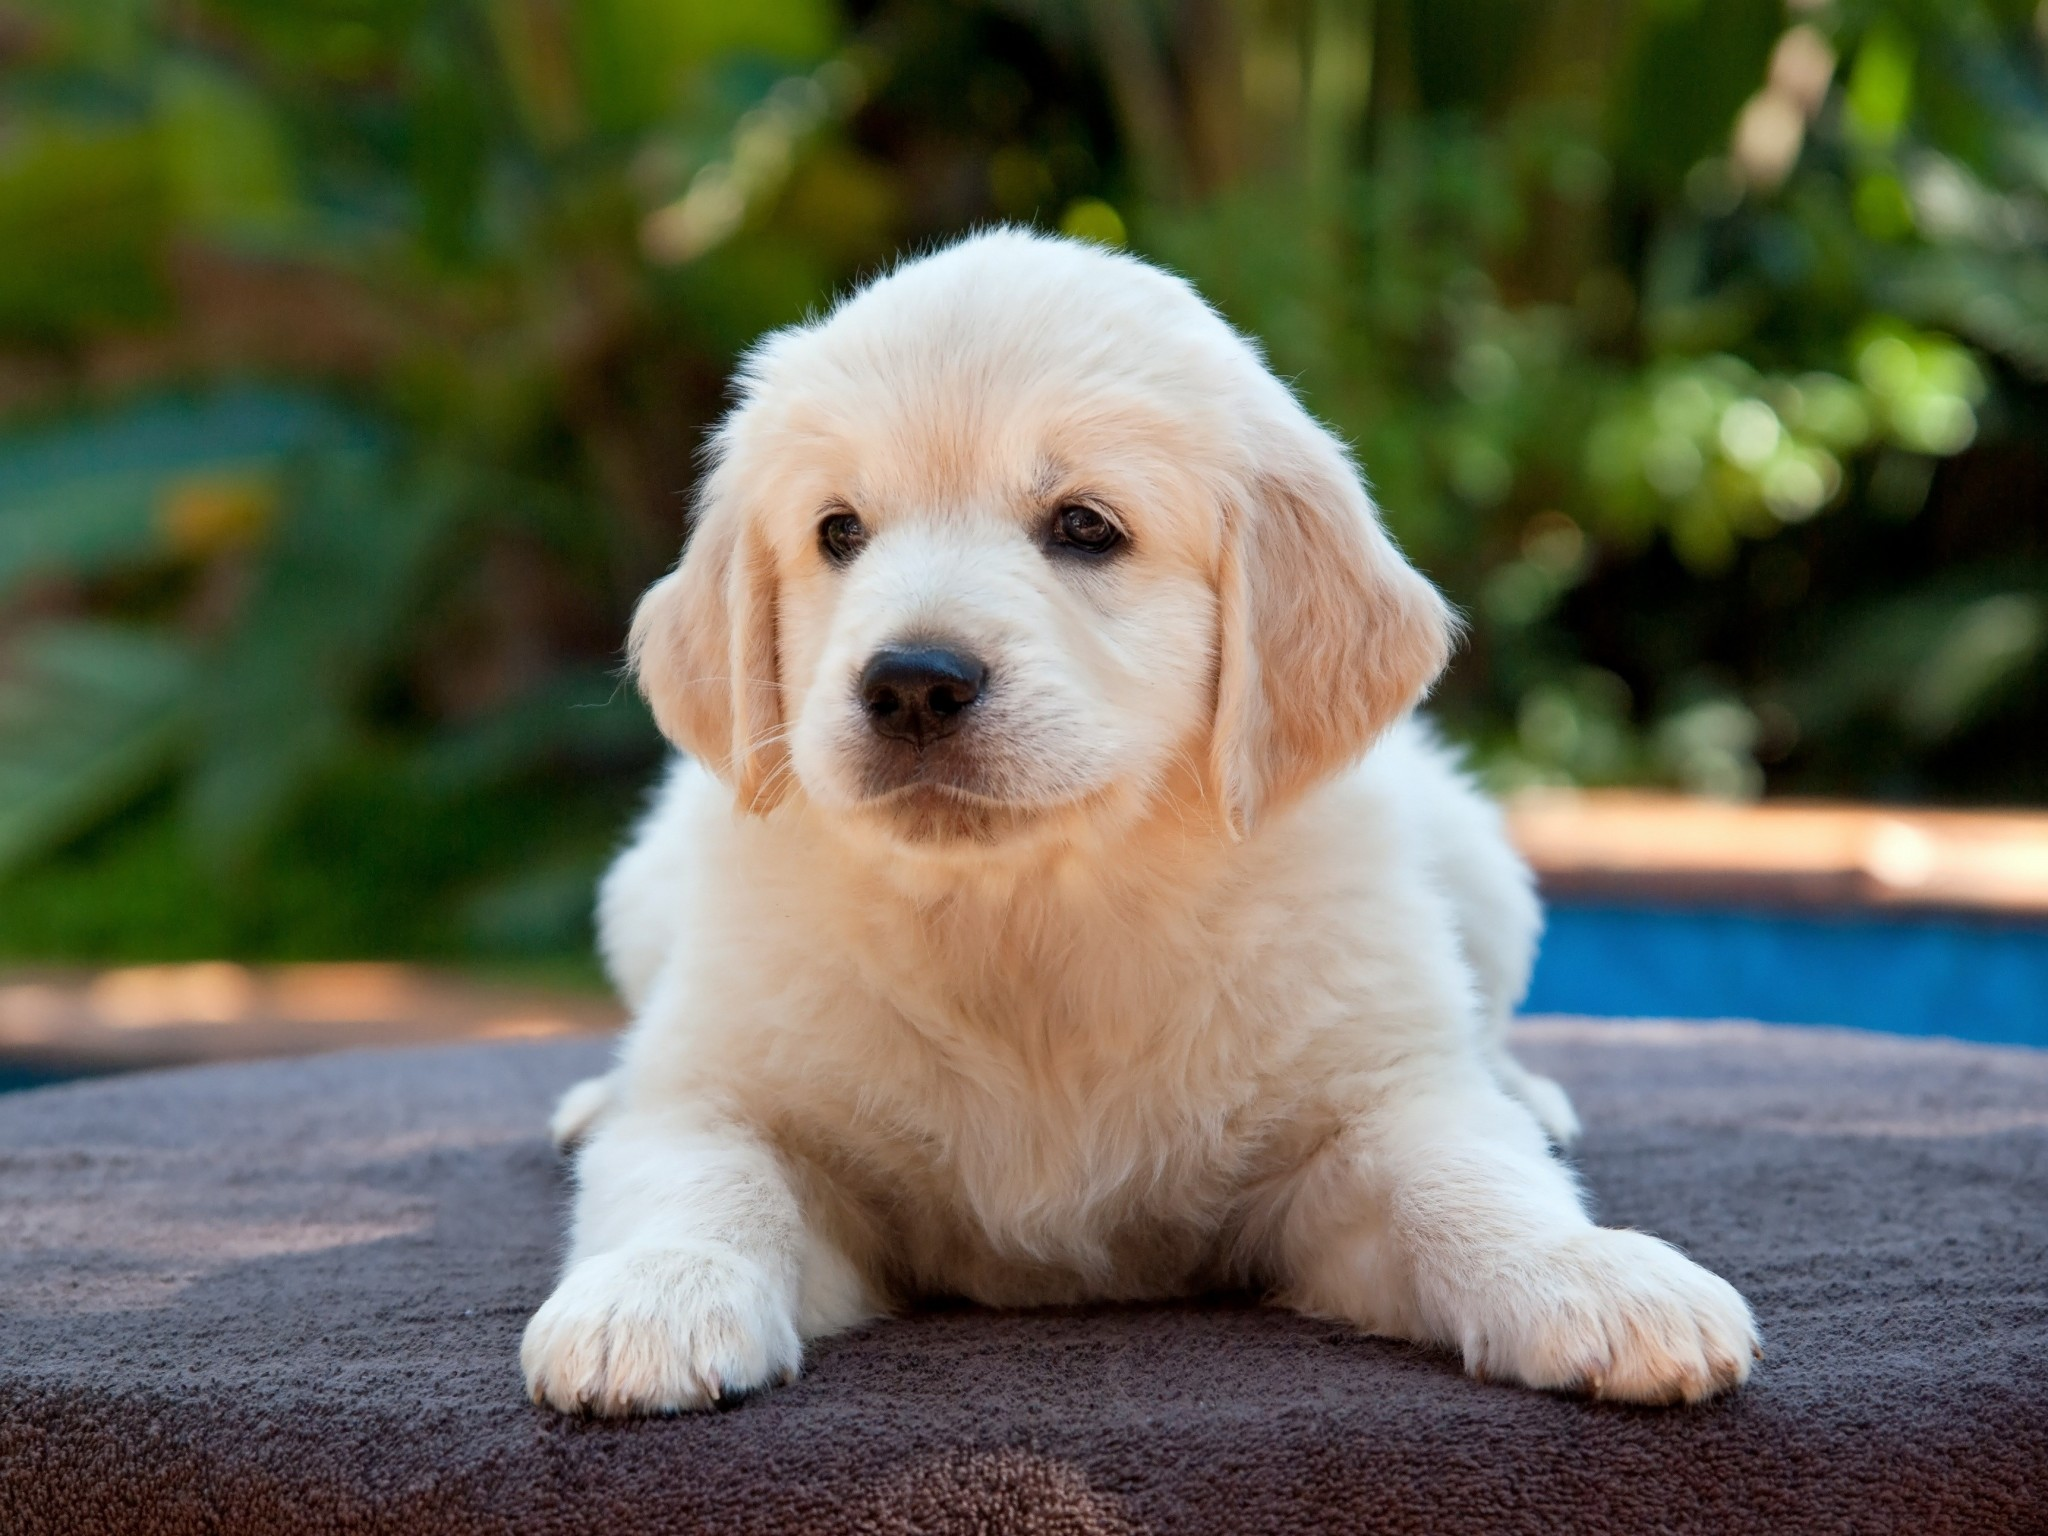

In [ ]:
cv2_imshow(img)

Saving DOG.jpg to DOG.jpg


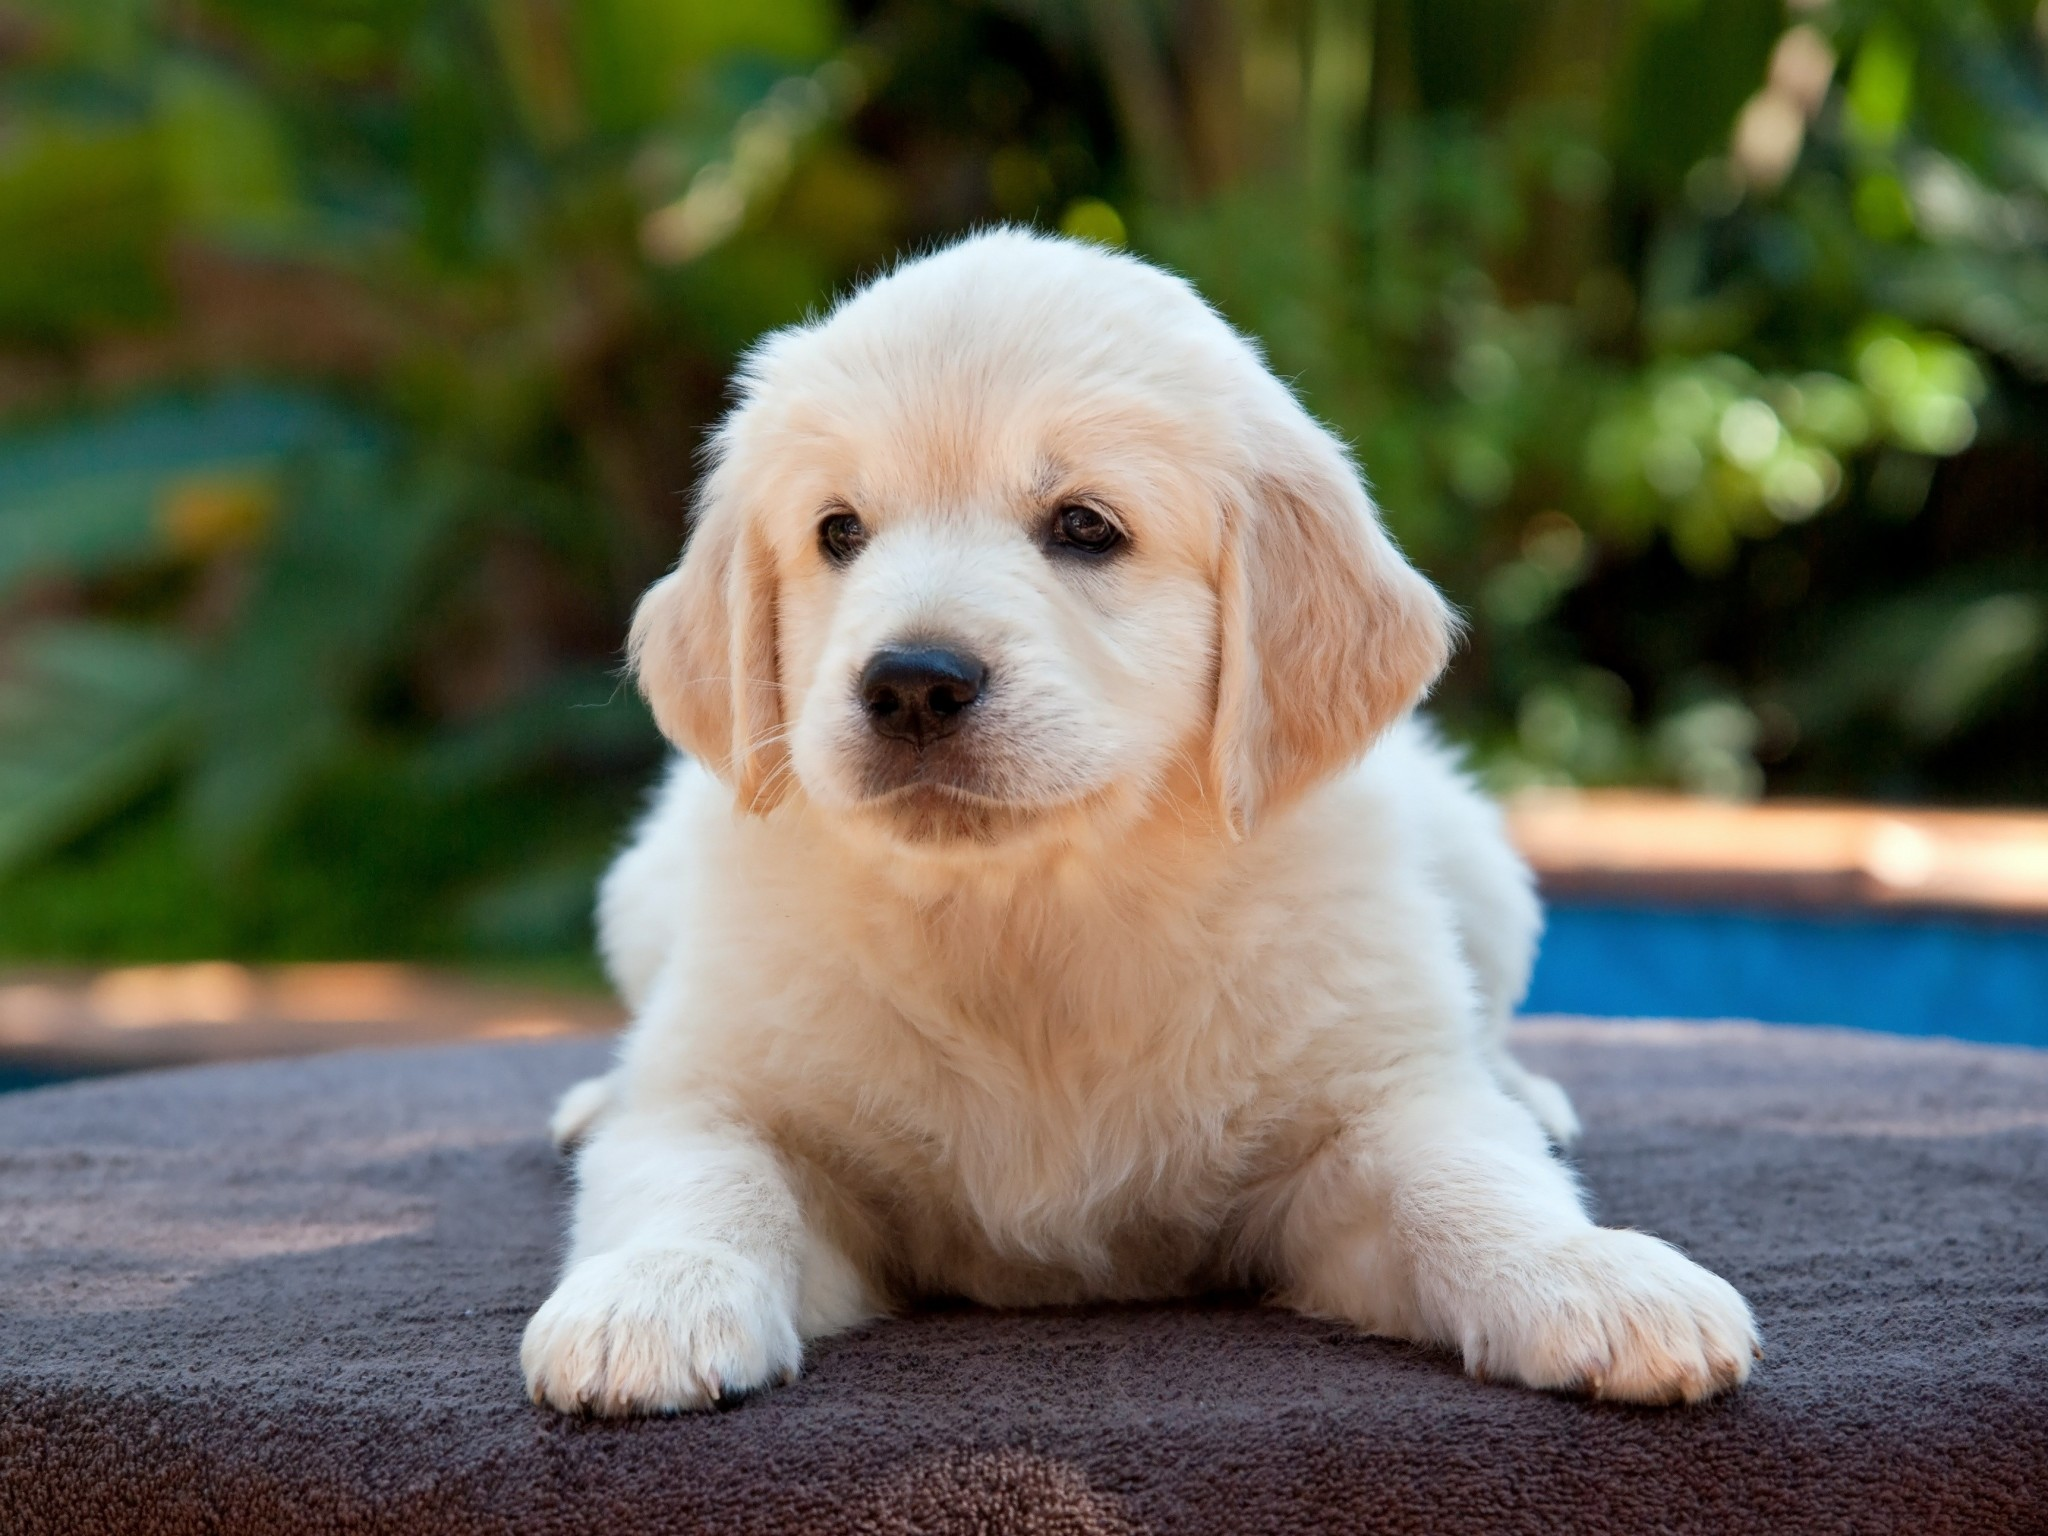

58889256/58889256 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

1/1 [==============================] - 2s 2s/step


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Caption: The image shows the same scene as the one in the video above.

The image shows the same scene as the one in the video above. The image shows the same scene as the one in the video above. The image shows the same scene


In [2]:
!pip install tensorflow keras transformers
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from transformers import AutoTokenizer, AutoModelForCausalLM
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
cv2_imshow(img)
vgg_model = VGG16(weights='imagenet', include_top=False)
def extract_features(image_path, model):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    features = model.predict(image)
    return features
tokenizer = AutoTokenizer.from_pretrained('gpt2')
caption_model = AutoModelForCausalLM.from_pretrained('gpt2')
def generate_caption(features, model, tokenizer):
    features = np.reshape(features, (features.shape[0], -1))
    input_ids = tokenizer.encode("The image shows", return_tensors='pt')
    outputs = model.generate(input_ids, max_length=50, num_return_sequences=1)
    caption = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return caption
features = extract_features(image_path, vgg_model)
caption = generate_caption(features, caption_model, tokenizer)
print("Generated Caption:", caption)
input_size = 2048
hidden_size = 256
vocab_size = 5000
max_length = 34

